In [38]:
import sys
import os
import pandas as pd
import numpy as np
project_root = os.path.abspath(os.path.join(os.getcwd(),".."))
sys.path.append(project_root)

# Testing the new channels

We recently got 4 new SiPHRA channels, so now we have connection to
channels 2, 4, 6, 8, 10, 12, 14, and 16. We connected each channel to SiPM
ch 5-8 and tested them individually with only background radiation. Then
we did the same test, but with a Cs-137 source. 

<table>
    <tr>
        <th><div align="center"> Parameter </div></th>
        <th><div align="center"> Value </div></th>
    </tr>
    <tr>
        <td><div align="left"> Charge comparator threshold (active channel) </div></td>
        <td> 20 </td>
    </tr>
    <tr>
        <td><div align="left"> Charge comparator threshold (inactive channels) </div></td>
        <td> 255 </td>
    </tr>

</table>

In [ ]:
import matplotlib.pyplot as plt

BITS_12 = 2**12
N_BINS = 512 

In [39]:
#Importing background data
dfs_bg = []
dfs_bg.append(pd.read_csv('../data/260212/1_SiPHRA_SiPM_newChannelsTest_Ch5-8_Ch2_QT_thr20_background.csv'))                 
dfs_bg.append(pd.read_csv('../data/260212/5_SiPHRA_SiPM_newChannelsTest_Ch5-8_Ch4_QT_thr20_background.csv'))
dfs_bg.append(pd.read_csv('../data/260212/2_SiPHRA_SiPM_newChannelsTest_Ch5-8_Ch6_QT_thr20_background.csv'))
dfs_bg.append(pd.read_csv('../data/260212/6_SiPHRA_SiPM_newChannelsTest_Ch5-8_Ch8_QT_thr20_background.csv'))
dfs_bg.append(pd.read_csv('../data/260212/3_SiPHRA_SiPM_newChannelsTest_Ch5-8_Ch10_QT_thr20_background.csv'))
dfs_bg.append(pd.read_csv('../data/260212/7_SiPHRA_SiPM_newChannelsTest_Ch5-8_Ch12_QT_thr20_background.csv'))
dfs_bg.append(pd.read_csv('../data/260212/4_SiPHRA_SiPM_newChannelsTest_Ch5-8_Ch14_QT_thr20_background.csv'))
dfs_bg.append(pd.read_csv('../data/260212/8_SiPHRA_SiPM_newChannelsTest_Ch5-8_Ch16_QT_thr20_background.csv'))

background_times = [158.063, 139.765, 174.846, 128.852, 164.299, 180.618, 132.460, 156.538]

single_ch_spectra_bg = [df[ch].tolist() for df, ch in zip(dfs_bg, ['Ch2', 'Ch4', 'Ch6', 'Ch8', 'Ch10', 'Ch12', 'Ch14', 'Ch16'])]

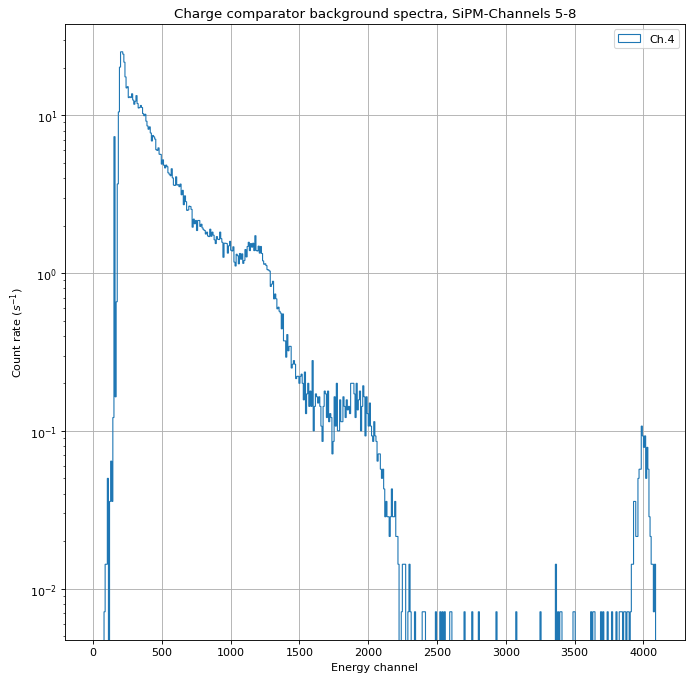

In [44]:
#Plotting background spectra
plt.figure(figsize=(10,10), dpi=80)
legend = ['Ch.2', 'Ch.4', 'Ch.6', 'Ch.8', 'Ch.10', 'Ch.12', 'Ch.14', 'Ch.16']
for idx,s in enumerate(single_ch_spectra_bg):
    plt.hist(s, N_BINS, range=(0,BITS_12), weights=(1/background_times[idx])*np.ones_like(s), log=True, histtype='step', label=legend[idx])
plt.legend()
plt.xlabel(r'Energy channel')
plt.ylabel(r'Count rate ($s^{-1}$)')
plt.title('Charge comparator background spectra, SiPM-Channels 5-8')
plt.xticks(np.arange(0,4500,500))
plt.grid()
#plt.savefig('../figures/QC_SiPMch5-8_8channels_bg.png')
plt.show()

In [42]:
#Importing 137Cs data
dfs_Cs = []
dfs_Cs.append(pd.read_csv('../data/260212/9_SiPHRA_SiPM_newChannelsTest_Ch5-8_Ch2_QT_thr20_Cs137.csv'))                       
dfs_Cs.append(pd.read_csv('../data/260212/10_SiPHRA_SiPM_newChannelsTest_Ch5-8_Ch4_QT_thr20_Cs137.csv'))
dfs_Cs.append(pd.read_csv('../data/260212/11_SiPHRA_SiPM_newChannelsTest_Ch5-8_Ch6_QT_thr20_Cs137.csv'))
dfs_Cs.append(pd.read_csv('../data/260212/12_SiPHRA_SiPM_newChannelsTest_Ch5-8_Ch8_QT_thr20_Cs137.csv'))
dfs_Cs.append(pd.read_csv('../data/260212/13_SiPHRA_SiPM_newChannelsTest_Ch5-8_Ch10_QT_thr20_Cs137.csv'))
dfs_Cs.append(pd.read_csv('../data/260212/14_SiPHRA_SiPM_newChannelsTest_Ch5-8_Ch12_QT_thr20_Cs137.csv'))
dfs_Cs.append(pd.read_csv('../data/260212/15_SiPHRA_SiPM_newChannelsTest_Ch5-8_Ch14_QT_thr20_Cs137.csv'))
dfs_Cs.append(pd.read_csv('../data/260212/16_SiPHRA_SiPM_newChannelsTest_Ch5-8_Ch16_QT_thr20_Cs137.csv'))

Cs137_times = [25.497, 24.604, 24.756, 24.517, 24.732, 24.813, 24.564, 24.710]

single_ch_spectra_cs = [df[ch].tolist() for df, ch in zip(dfs_Cs, ['Ch2', 'Ch4', 'Ch6', 'Ch8', 'Ch10', 'Ch12', 'Ch14', 'Ch16'])]

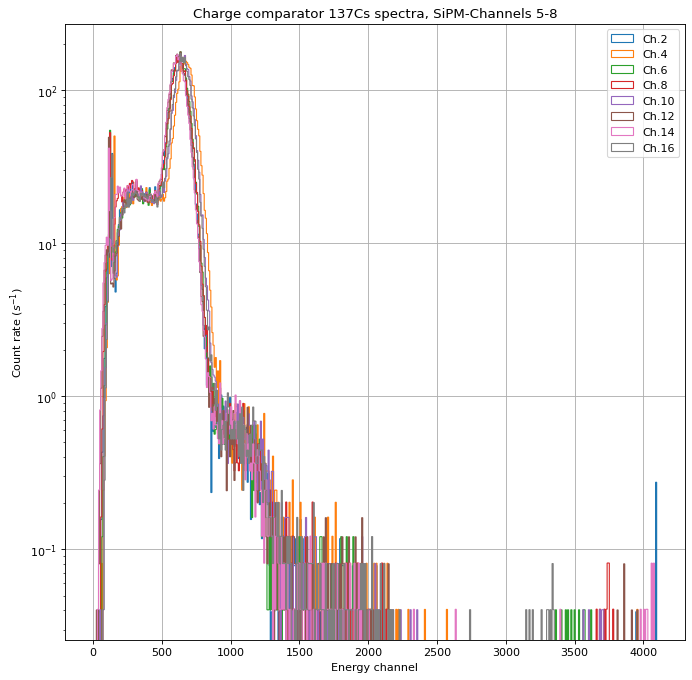

In [43]:
#Plotting 137Cs spectra
plt.figure(figsize=(10,10), dpi=80)
legend = ['Ch.2', 'Ch.4', 'Ch.6', 'Ch.8', 'Ch.10', 'Ch.12', 'Ch.14', 'Ch.16']
for idx,s in enumerate(single_ch_spectra_cs):
    plt.hist(s, N_BINS, range=(0,BITS_12), weights=(1/Cs137_times[idx])*np.ones_like(s), log=True, histtype='step', label=legend[idx])
plt.legend()
plt.xlabel(r'Energy channel')
plt.ylabel(r'Count rate ($s^{-1}$)')
plt.title('Charge comparator 137Cs spectra, SiPM-Channels 5-8')
plt.xticks(np.arange(0,4500,500))
plt.grid()
#plt.savefig('../figures/QC_SiPMch5-8_8channels_137Cs.png')
plt.show()